In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

In [15]:
def f(x, y):
    return np.sin(x) ** 10 +np.cos(10 + y * x) * np.cos(x)

In [16]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

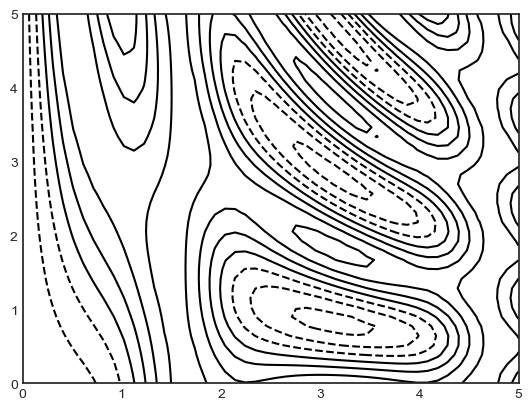

In [17]:
plt.contour(X, Y, Z, colors='black');

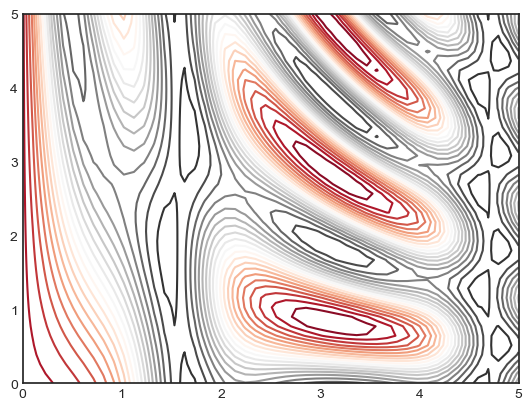

In [18]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

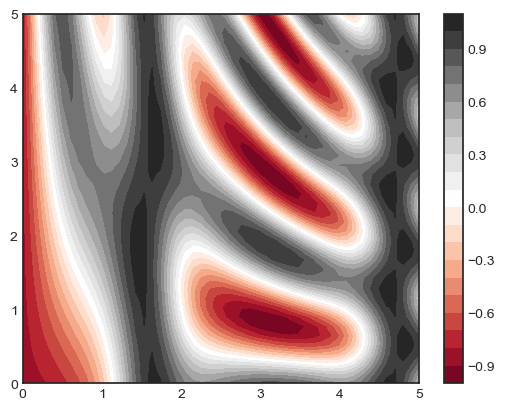

In [19]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

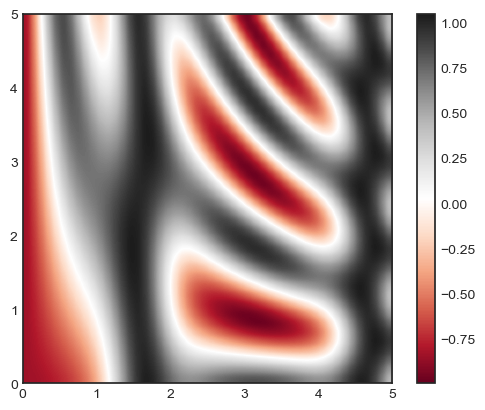

In [20]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

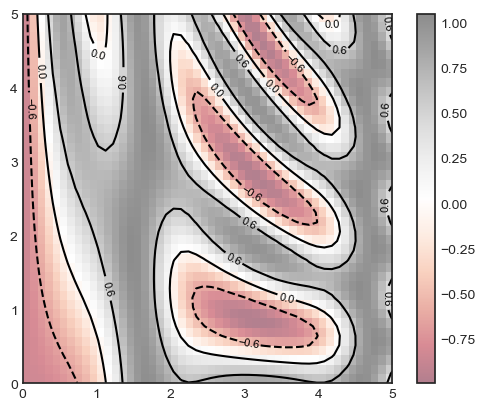

In [26]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

In [27]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

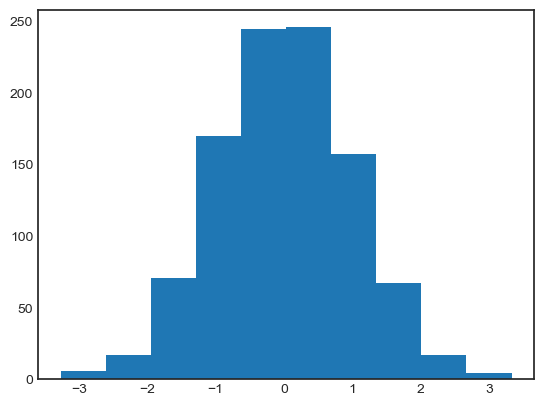

In [29]:
plt.hist(data);

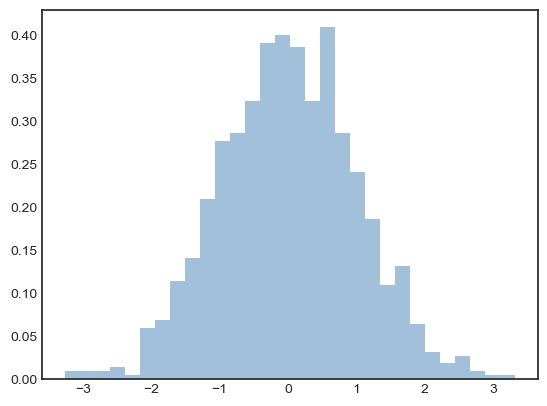

In [30]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

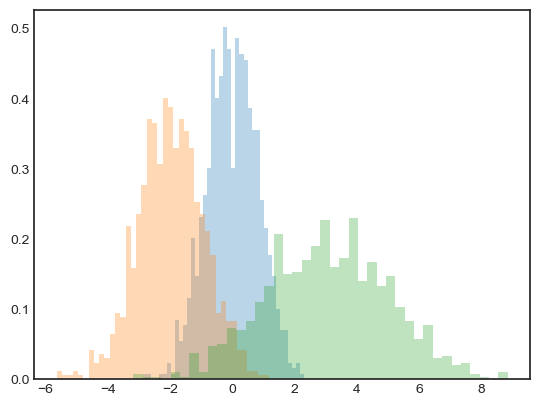

In [31]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [32]:
counts, binedges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


In [45]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

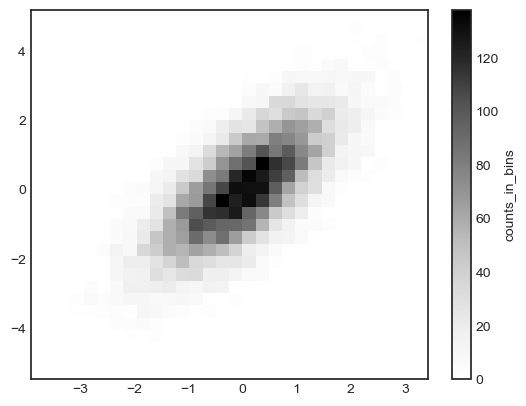

In [51]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts_in_bins')

In [52]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


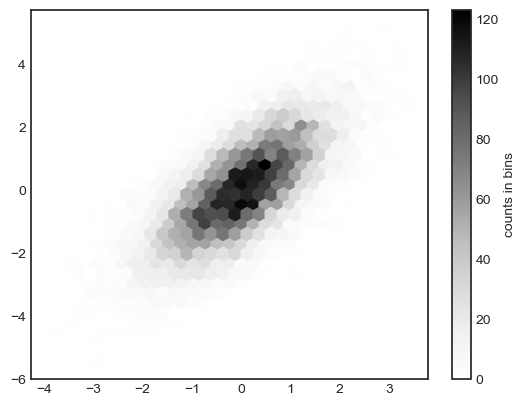

In [53]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='counts in bins')

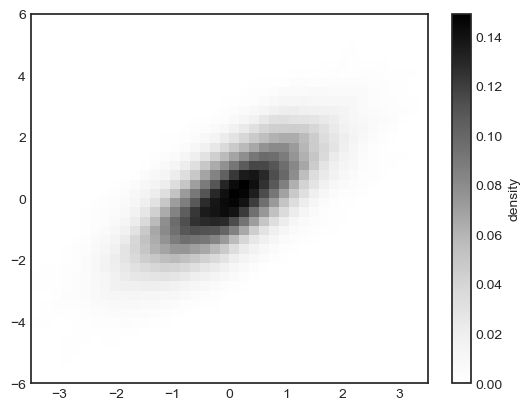

In [55]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")